# Import the necessary libraries and read the csv file

# Evaluate the dataset using some pandas functions

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [5]:
dataset = pd.read_csv('Salary_Data.csv')

In [32]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
YearsExperience    30 non-null float64
Salary             30 non-null float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [9]:
dataset.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [33]:
dataset.head(5)

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [ ]:
X = dataset.iloc[:,:-1]

y = dataset.iloc[: , 1]
# this cause the y to be a series 
# there is no problem but just in case so just converted it into dataframe

In [19]:
y = pd.DataFrame(data = y)


# Now split the data into training and testing data


In [20]:
from sklearn.model_selection import train_test_split

In [25]:
Xtrain , Xtest , ytrain , ytest = train_test_split(X , y , test_size = 0.24 , random_state = 0)

 # Use Standardization 

 We can avoid this step in case of linear regression

 As the library that we use will do the feature scaling for us 


In [27]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

In [28]:
Xtrain = sc.fit_transform(Xtrain)
Xtest = sc.transform(Xtest)

# Now train the Simple Linear Regression Model

In [31]:
from sklearn.linear_model import LinearRegression

In [35]:
lr = LinearRegression()

In [36]:
lr.fit(Xtrain , ytrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)


# Test the trained Model


In [37]:
ypred = lr.predict(Xtest)

In [42]:
error = ypred - ytest

error

,Salary
2,3325.257055
28,1206.709384
13,8362.504334
10,349.562235
26,-875.059010
24,-840.827403
27,4396.912039
11,8711.533285


# Checking how well the model predicted the training data

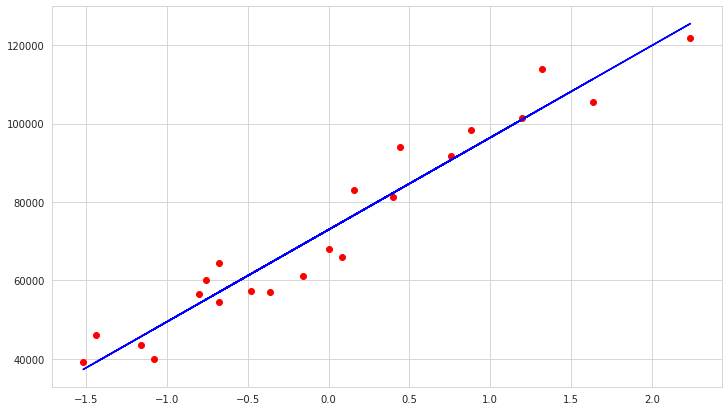

In [47]:
sns.set_style('whitegrid')

plt.figure(figsize = (12,7))

plt.scatter(Xtrain,ytrain,color = 'red')
plt.plot(Xtrain , lr.predict(Xtrain) ,color = 'blue')


# Checking how well the model predicted the test data

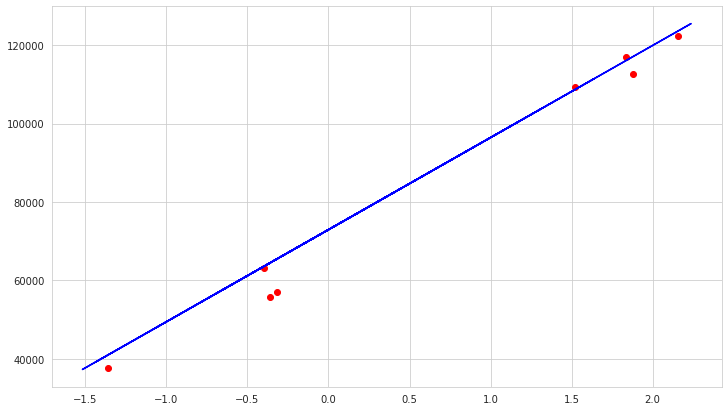

In [49]:
plt.figure(figsize = (12,7))

plt.scatter(Xtest , ytest , color = 'red')
plt.plot(Xtrain , lr.predict(Xtrain) ,color = 'blue')